In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [13]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [18]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [19]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

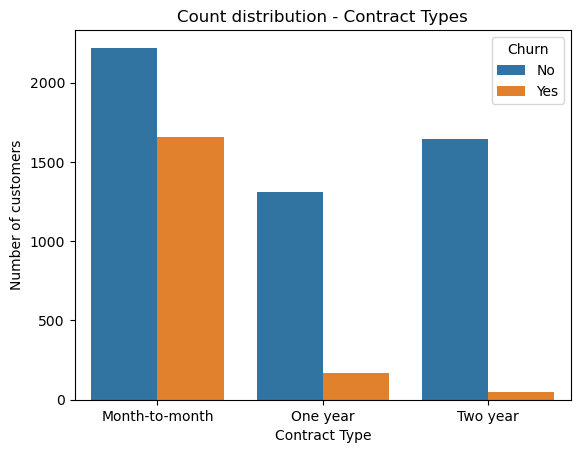

In [20]:
##DATA VISUALIZATION

sns.countplot(data = df, x = 'Contract', hue = 'Churn')
plt.title("Count distribution - Contract Types")
plt.xlabel('Contract Type')
plt.ylabel('Number of customers')
plt.show()

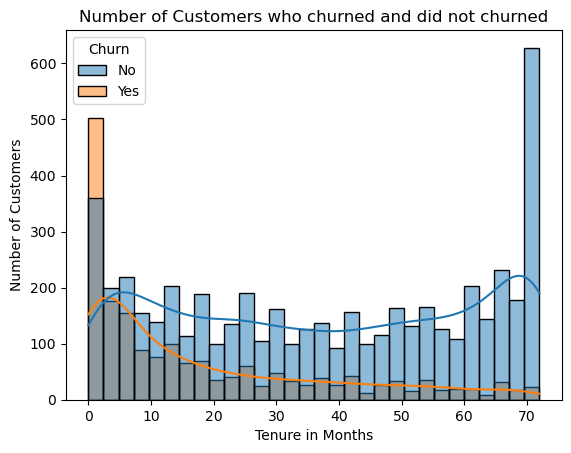

In [26]:
sns.histplot(data = df, x = 'tenure', kde = True, hue = 'Churn', bins = 30)
plt.title("Number of Customers who churned and did not churned")
plt.xlabel("Tenure in Months")
plt.ylabel("Number of Customers")
plt.show()

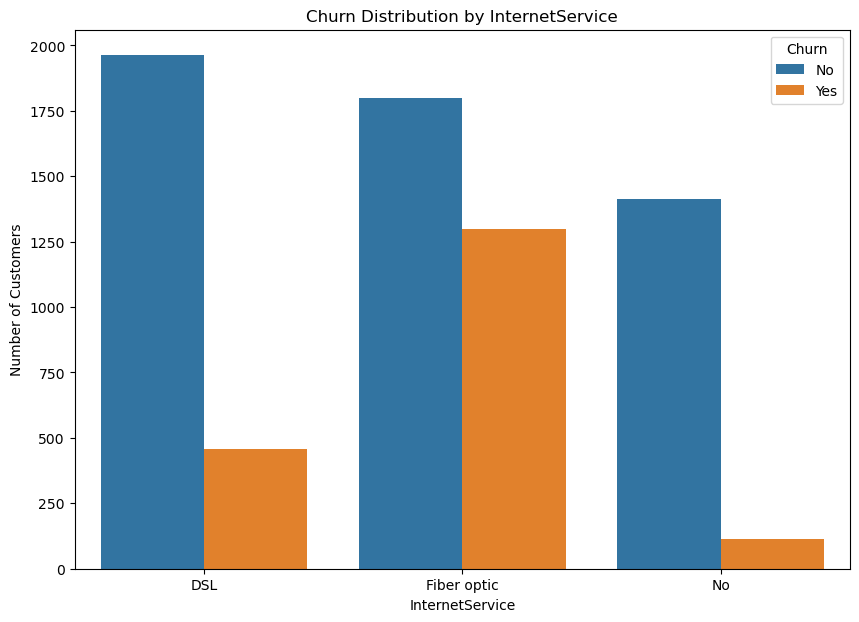

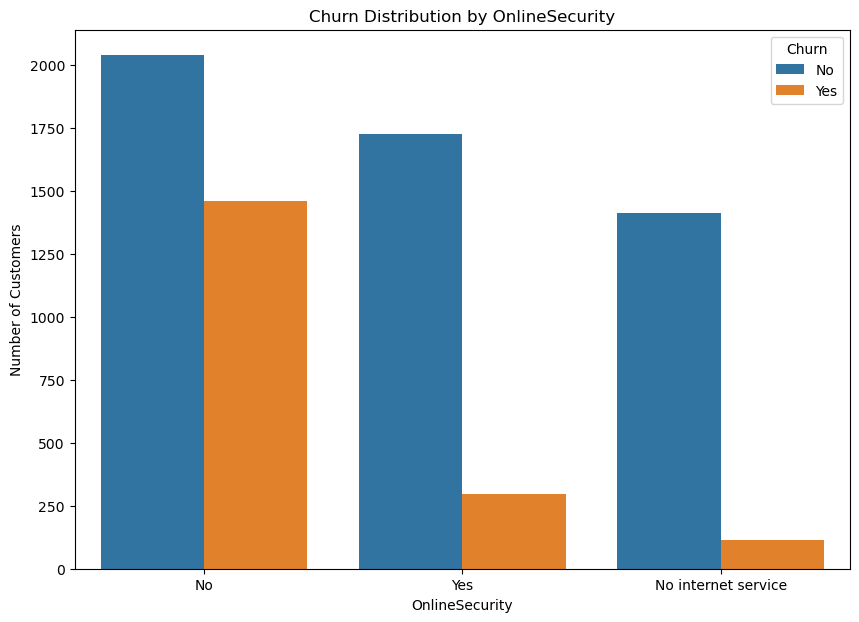

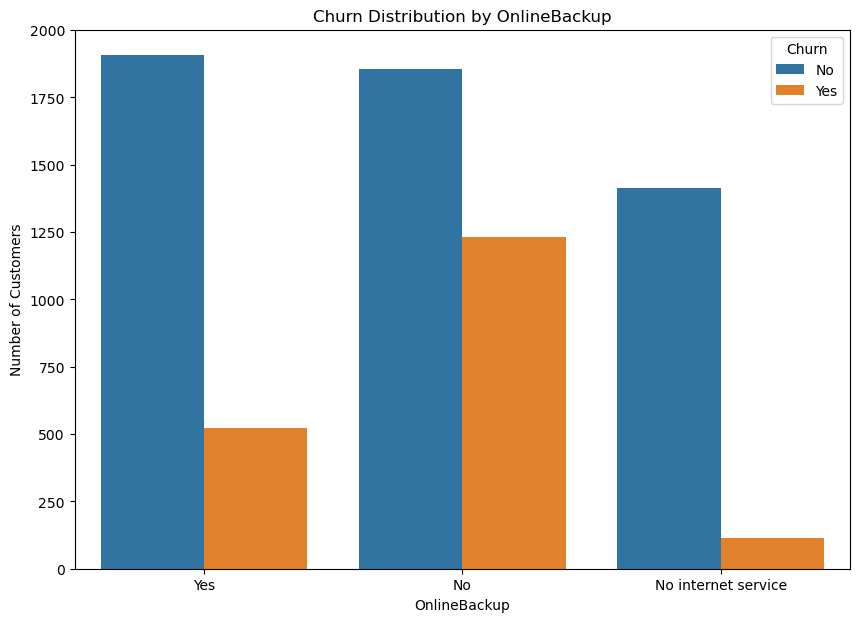

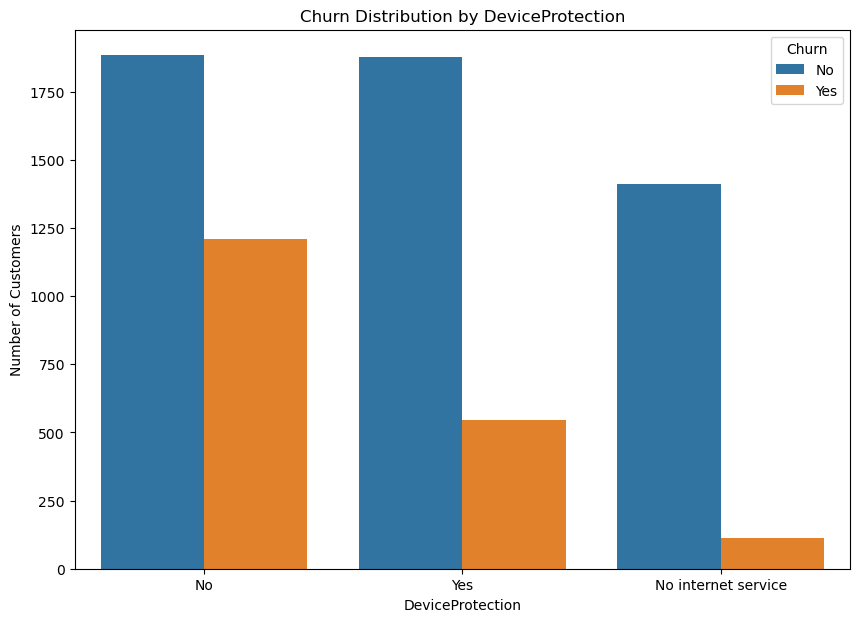

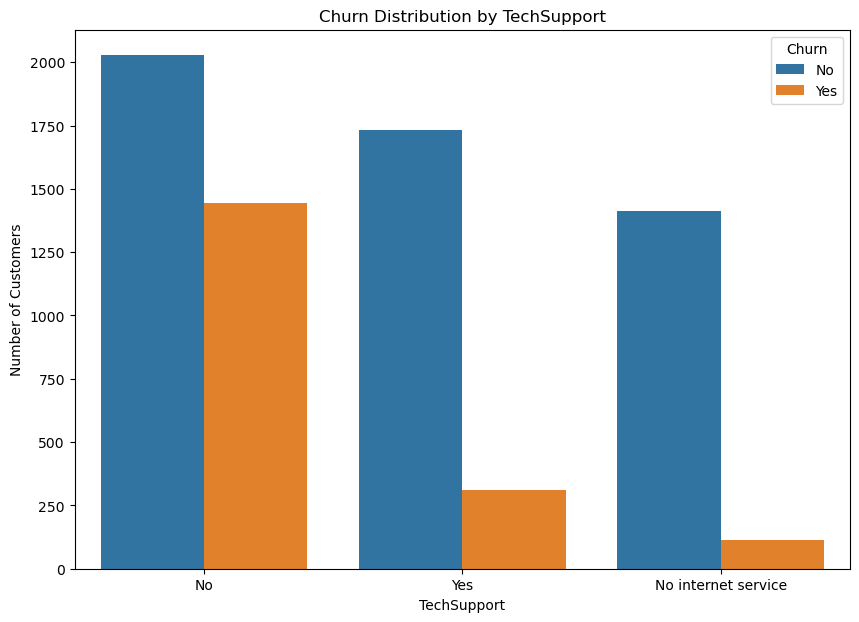

In [31]:
##Churn Type in Additional services and Internet type

Additional_Services = ['InternetService','OnlineSecurity', 'OnlineBackup','DeviceProtection','TechSupport']

for Services in Additional_Services:
    plt.figure(figsize=(10,7))
    sns.countplot(data = df,x= Services, hue = 'Churn')
    plt.title(f'Churn Distribution by {Services}')
    plt.xlabel(Services)
    plt.ylabel('Number of Customers')
    plt.show()
    
    


In [33]:
Churn_payment = df.groupby('PaymentMethod')['Churn'].value_counts(normalize = True).unstack()*100
print(Churn_payment)

Churn                             No        Yes
PaymentMethod                                  
Bank transfer (automatic)  83.290155  16.709845
Credit card (automatic)    84.756899  15.243101
Electronic check           54.714588  45.285412
Mailed check               80.893300  19.106700


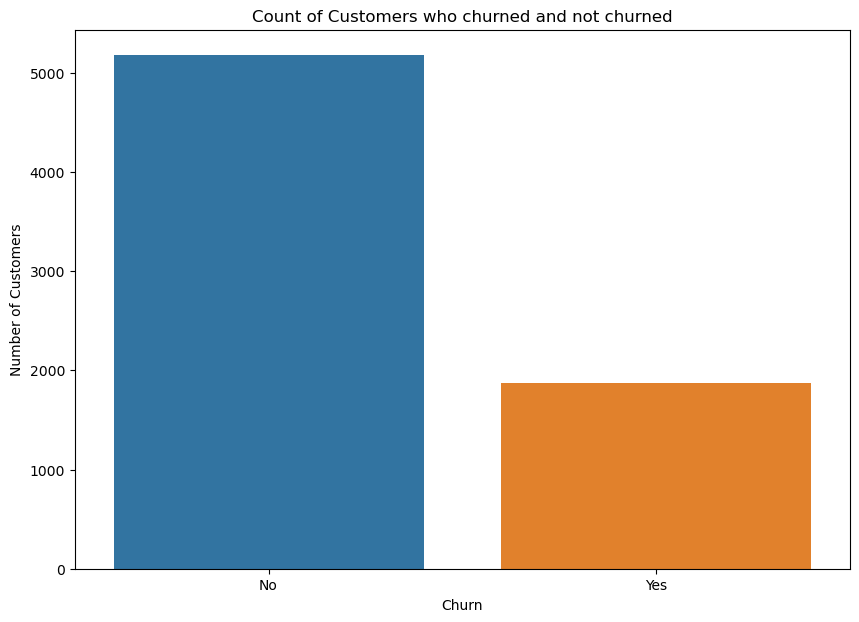

In [36]:
##Count of Churn and Non-Churn

plt.figure(figsize = (10,7))
sns.countplot(data = df, x = 'Churn')
plt.title("Count of Customers who churned and not churned")
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()